In [57]:
## author : zhangqian
## date : 20220120

In [1]:
## 需要用到的包最好在一开始就导入
import matplotlib.pyplot as plt ## 导入matplotlib模块的一个分模块并起名字


## read rmsd.xvg
with open("rmsd.xvg", "r") as fo:
    lines = fo.readlines() 

#print(lines[:20]) ##打印前二十行

##deal with content of file ##
time_list, rmsd_list = [], []

## remove empty lines
lines = [ line for line in lines if len(line) !=0]

for line in lines:
    ## ignore all # lines
    if line[0] == "#":
    #if line.startswith("#"): ##另一种写法
        continue

    ## get the axis info
    if line[0] == "@":
        if "xaxis"  in line:
            xaxis = line.strip().strip('"').split('"')[1] ##先去掉两端双引号，再取以双引号分割的最后一个字符串元素就是单位,双引号的包裹
        if "yaxis"  in line:
            yaxis = line.strip().strip('"').split('"')[1]

    ##deal with data line#
    if not line.startswith("@") and not line.startswith("#"): ##
        items = line.strip().split()
        time_list.append(float(items[0]))
        rmsd_list.append(float(items[1]))

## check length of time_list, rmsd_list
if len(time_list) != len(rmsd_list):
    print("Wrong in length of time_list and rmsd_list")
    exit()

#print(len(time_list), len(rmsd_list))

## save data csv file
with open("rmsd.csv", "w") as fo:
    fo.write(xaxis+","+yaxis+"\n")  #csv读取，作为分列标志
    for i in range(len(time_list)):
        fo.write("{}, {}\n".format(time_list[i], rmsd_list[i]))

print("congratulations ！")

#print(xaxis, yaxis)



congratulations ！


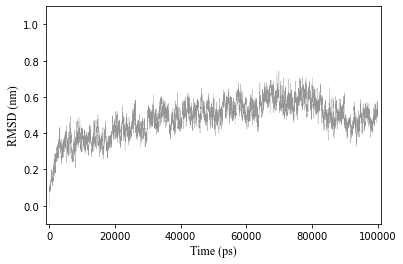

In [2]:
##借助task2读取的time_List和rmsd_list
## 绘制数据
plt.plot(time_list, rmsd_list, 
         color = '#969696', ## 线条颜色
         linestyle = '-', ## 线条形状
         linewidth = 0.3,) ## 线宽
         ## marker = 'p',标记风格
         ## markersize = 15,标记大小
         ## markeredgecolor = 'b',标记的轮廓颜色
         ## markerfacecolor = 'r' 标记的填充颜色
         ## label = "xxxx" 图例

## 绘制坐标轴标签以及图标标题
plt.xlabel(xaxis,font = 
        {'family': 'Times New Roman',
         'style': 'normal',
         'weight': 'bold',
        'size': 12,
        }) 
plt.ylabel(yaxis,font = 
        {'family': 'Times New Roman',
         'style': 'normal',
         'weight': 'bold',
        'size': 12,
        }) 
#plt.title("xxxxx")

## 控制坐标轴范围
#plt.xlim(0,100000)
#plt.ylim(0,1.0)

##另一种控制坐标轴范围
plt.axis([-1000, 101000, -.1, 1.1]);

##保存
plt.savefig("rmsd.png",dpi=600)

## 显示图像
plt.show()




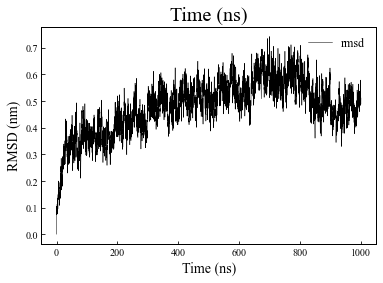

In [19]:
## 需要用到的包最好在一开始就导入
import matplotlib.pyplot as plt ## 导入matplotlib模块的一个分模块并起名字
from matplotlib import pylab as pylab

## 绘图控制参数
myparams = {
    'font.family': 'Times New Roman',       ## 全局字体控制
    'axes.titlesize': 20,                   ## 图表标题字体大小
    'axes.labelsize': 14,                   ## 轴标题字体大小
    'xtick.labelsize': 10,                  ## 横轴刻度标签字体大小
    'ytick.labelsize': 10,                  ## 纵轴刻度标签字体大小
    'legend.fontsize': 12,                  ## 图例字体大小
    'lines.linewidth' : 0.5,                ## 数据线宽
    'axes.linewidth' : 1,                   ## 图表轮廓线宽
    #'xtick.bottom' : False,                ##
    'xtick.bottom' : True,                  ##横轴刻度线
    'ytick.direction' : 'in',               ##刻度方向
    'xtick.direction' : 'in',               ##刻度方向
    'legend.fancybox' : False,              ##图例框线
    'legend.frameon' : False,               ## 关闭则不能调节图例的背景色，线宽等参数
    'legend.loc' : 'upper right',           ## 图例的位置 ['best', 'upper right', 'upper left',
                                            ## 'lower left', 'lower right', 'right', 'center left',
                                            #  'center right', 'lower center', 'upper center', 'center']
    'savefig.dpi' : 600,                    ## 保存图片的分辨率
}

pylab.rcParams.update(myparams)

## 从csv文件中读取并切割数据
with open("rmsd.csv", "r") as fo:
    lines = fo.readlines()

## deal with data
xname, yname = lines[0].split(",")[0], lines[0].split(",")[1].strip() 

time_list, rmsd_list = [], []

## read data
for line in lines[1:]:
    item = line.strip().split(",")
    time_list.append(float(item[0].strip()))
    rmsd_list.append(float(item[1].strip()))

time_list = [t/100 for t in time_list]

## plot data
plt.plot(time_list, rmsd_list,'k', label = "rmsd")
plt.xlabel("Time (ns)")
plt.ylabel(yname)
plt.title("Time (ns)")
plt.legend()
plt.savefig("rmsd2.png")